In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_projection_benchmarks, do_selection_benchmarks, do_join_benchmarks, do_one_hot_encoder_benchmarks
import matplotlib
import statistics

from mlinspect.utils import get_project_root

Defined plot_runtimes, example output:


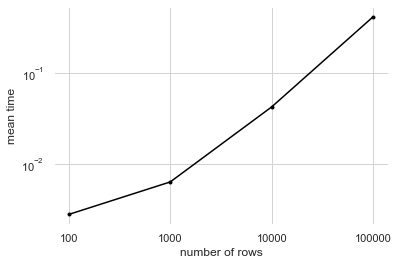

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #major_ticks = np.arange(0, 10, 3)
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


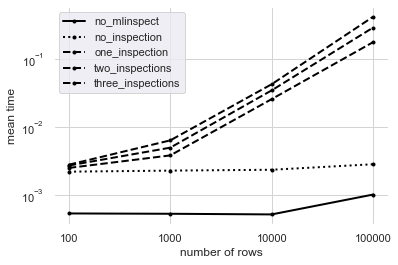

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [4]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

projection_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_projection_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = projection_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        projection_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in projection_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0005497914000000215, 0.0007658228000002154, 0.0006384794000000582, 0.0008931876000000116]
no inspection: [0.004633669599999735, 0.0029235972000000387, 0.0028766013999998565, 0.0025007814000000293]
one inspection: [0.004158513599999835, 0.004769031599999885, 0.018606300200000092, 0.19879629799999954]
two inspections: [0.0043082010000000896, 0.005295777800000146, 0.034190084199999936, 0.2761037858000005]
three inspections: [0.003998210199999619, 0.008545834800000129, 0.0442316366, 0.3743035350000003]


Projection results


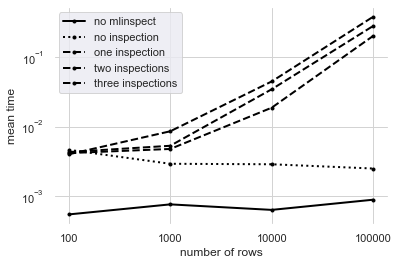

In [5]:
print('Projection results')

projection_linestyles = {"no mlinspect": "solid", 
             "no inspection": "dotted", 
             "one inspection": "dashed", 
             "two inspections": "dashed", 
             "three inspections": "dashed"}

plot_runtimes_all(row_numbers, projection_mean_benchmark_results, projection_linestyles, 'all_runtimes_projection')

In [6]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

selection_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_selection_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = selection_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        selection_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in selection_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.00042747419999962234, 0.0004660061999999243, 0.0004901021999998533, 0.0017048393999992584]
no inspection: [0.005253257599999372, 0.00484279340000029, 0.005784206800000291, 0.01668018159999889]
one inspection: [0.007879206800000205, 0.010087431800000601, 0.036356885399999685, 0.29836063920000055]
two inspections: [0.008586607200000174, 0.01191710040000018, 0.05205824240000005, 0.45702685979999913]
three inspections: [0.008556491200000594, 0.014289615999999939, 0.06751904259999968, 0.6261691972000001]


Selection results


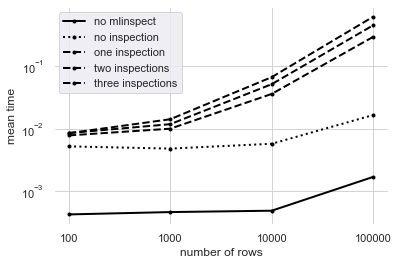

In [7]:
print('Selection results')

plot_runtimes_all(row_numbers, selection_mean_benchmark_results, projection_linestyles, 'all_runtimes_selection')

In [8]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

join_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_join_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = join_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        join_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in join_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.001903189599999422, 0.0018266510000003676, 0.0034595142000000577, 0.019437637000000053]
no inspection: [0.006373680600000142, 0.0073423806000008085, 0.011151051800000289, 0.05459327080000094]
one inspection: [0.015202410599999893, 0.018550740799999944, 0.053630569600000656, 0.39302069740000006]
two inspections: [0.015435242800000281, 0.018255865600000476, 0.08326094760000018, 0.5538826079999979]
three inspections: [0.013739203400000122, 0.01881360579999978, 0.08039752179999908, 0.7502455826000002]


Join results


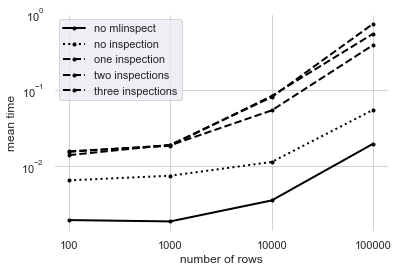

In [9]:
print('Join results')

plot_runtimes_all(row_numbers, join_mean_benchmark_results, projection_linestyles, 'all_runtimes_join')

In [10]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

one_hot_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_one_hot_encoder_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = one_hot_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        one_hot_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in one_hot_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0005624277999999094, 0.0007703575999997269, 0.0022902188000017533, 0.022952776799998277]
no inspection: [0.0025630232000011686, 0.0021299190000021893, 0.003658402599999988, 0.02233990340000247]
one inspection: [0.002539744399999222, 0.003908352199999854, 0.0179349318000007, 0.16092163199999873]
two inspections: [0.0024095693999981902, 0.004873496200001171, 0.02793010640000091, 0.27390430600000004]
three inspections: [0.0025540758000005327, 0.00598117960000053, 0.04325155020000011, 0.36443133599999983]


OneHotEncoder results


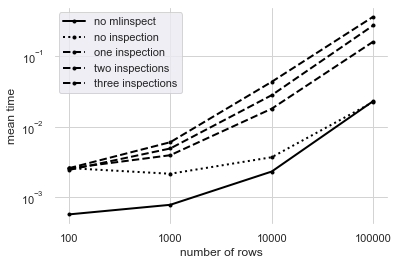

In [11]:
print('OneHotEncoder results')

plot_runtimes_all(row_numbers, one_hot_mean_benchmark_results, projection_linestyles, 'all_runtimes_one_hot')